In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

import import_ipynb
from environment import GameOfLifeEnv

importing Jupyter notebook from environment.ipynb


In [2]:
print(GameOfLifeEnv)
env = GameOfLifeEnv(grid_size=8, seed=9)
state = env.reset()

states = []
states.append(np.copy(state))
done = False
while not done:
    state, r, done = env.step()
    states.append(np.copy(state))
# print(len(states), states)

<class 'environment.GameOfLifeEnv'>


251 [[0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1.]]
[25. 26. 22. 20. 28. 24. 23. 20. 34. 17. 18. 22. 11. 12. 15. 19. 15. 18.
 17. 16. 17. 17. 16. 16. 19. 23. 28. 20. 33. 15. 17. 15. 16. 14. 14. 21.
 18. 21. 22. 22. 28. 18. 21. 28. 19. 24. 15. 21. 16. 21. 20. 26. 23. 22.
 19. 20. 25. 25. 22. 35. 11. 11. 10. 13. 15. 14. 15. 12. 15. 11. 13. 11.
 13. 10.  9.  4.  4.  4.  7.  6.  6.  8.  8. 12. 12. 20. 12.  8.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

<IPython.core.display.Javascript object>


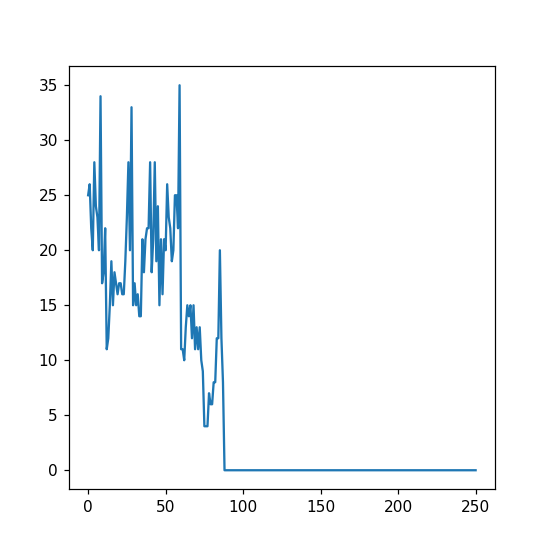

<IPython.core.display.Javascript object>


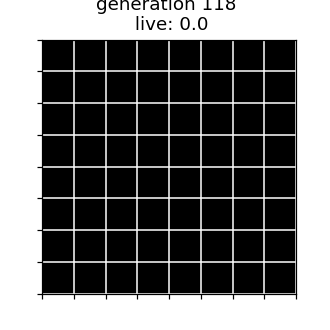

In [23]:
%matplotlib notebook
n = 8
env = GameOfLifeEnv(grid_size=n, density=0.4, seed=9453)
rewards = np.zeros(251)
# print(rewards)
states = np.zeros((251, n, n))
# print(states)


# states.append(np.copy(state))
done = False
i = 0

while not done:
    state, r, done = env.step()
#     print(state)
#     print(r)
    rewards[i] = r
    states[i] = np.copy(state)
    i += 1
    

# print(rewards[:5], states[:5])
print(len(states), states[0])
print(rewards)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(rewards)
##########################################

    
fig, axes = plt.subplots(1, 1, figsize=(3, 3)) 
plt.title("Conway's Game of Life")
plt.grid(color='w', linestyle='-', linewidth=1)
axes.set_xticks(np.arange(-0.5, n, 1))
axes.set_yticks(np.arange(-0.5, n, 1))
axes.set_xticklabels(['']*(n+1))
axes.set_yticklabels(['']*(n+1))

im = axes.imshow(states[0], vmin=0, vmax=2, cmap=plt.cm.gray)

def init():
    im.set_data(states[0])

def animate(i):
    im.set_data(states[i])
    axes.set_title('generation {} \n live: {}'.format(i, np.sum(states[i])))   
    
ani = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, frames = range(len(states)), interval=100)


plt.show()

## Fixed grid size; fixed initial density; vary inital state (random seed) 


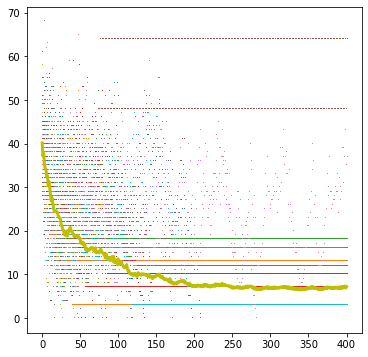

In [22]:
env = GameOfLifeEnv(grid_size=12, density=0.5) #, save_states = True)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
average = np.zeros(401)

for i in range(60):
    state = env.reset()
    rewards = []

    done = False
    while not done:
        state, r, done = env.step()
        rewards.append(r)

    ax.plot(rewards, ',')
    
    rewards_filled = np.append(np.array(rewards), rewards[-1] * np.ones(401 - len(rewards)))
    average = (i * average + rewards_filled) / (i + 1)
    
ax.plot(average, 'y', linewidth=3)
plt.show()

## Fixed initial density; vary grid size look for diferences

## Vary initial density - average over seeds; fixed grid size

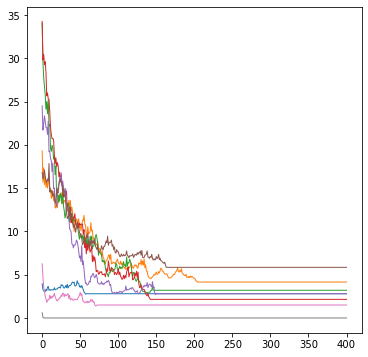

In [31]:
n = 10
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for d in np.arange(0.1, 0.9, 0.1):
    env = GameOfLifeEnv(grid_size=n, density=d) #, save_states = True)
    average = np.zeros(401)

    for i in range(20):
        state = env.reset()
        rewards = []

        done = False
        while not done:
            state, r, done = env.step()
            rewards.append(r)


        rewards_filled = np.append(np.array(rewards), rewards[-1] * np.ones(401 - len(rewards)))
        average = (i * average + rewards_filled) / (i + 1)

    ax.plot(average, linewidth=1)
    
plt.show()